# VEHICLE INSURANCE CLAIM FRAUD DETECTION

In [ ]:
## Import the required Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [30]:
## Loading the data
df = pd.read_csv(r"C:\\Users\\Administrator\\Desktop\\Wangari Muchai\\Data sets\\Fraud_Oracle.csv", sep=',')

## Displaying the data set
df.head(5)

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [31]:
# Getting details of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [32]:
## Understanding the data statistically
df.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,39.855707,0.059857,7710.500000,8.483268,407.704280,2.487808,1994.866472
std,1.287585,1.259115,13.492377,0.237230,4451.514911,4.599948,43.950998,1.119453,0.803313
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,0.000000,3855.750000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,0.000000,7710.500000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,0.000000,11565.250000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,1.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000


In [33]:
#removing duplicates and unnecessary columns
df.drop_duplicates()
df.drop(['PolicyNumber','RepNumber'],inplace=True,axis=1)

In [34]:
# Splitting the data into fraud data and non-fraud data
fraud_data = df[df.FraudFound_P==1]
nonfraud_data = df[df.FraudFound_P==0]

print('non-fraud claims: ' + str(len(nonfraud_data)))
print('fraud claims: ' + str(len(fraud_data)))
print('total claims: ' + str(len(fraud_data+nonfraud_data)))



non-fraud claims: 14497
fraud claims: 923
total claims: 15420


<AxesSubplot:ylabel='FraudFound_P'>

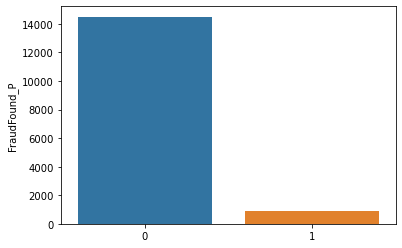

In [35]:
## Barplot of fraud claims vs non_fraud claims
sns.barplot(x=df['FraudFound_P'].value_counts().index,y=df['FraudFound_P'].value_counts())

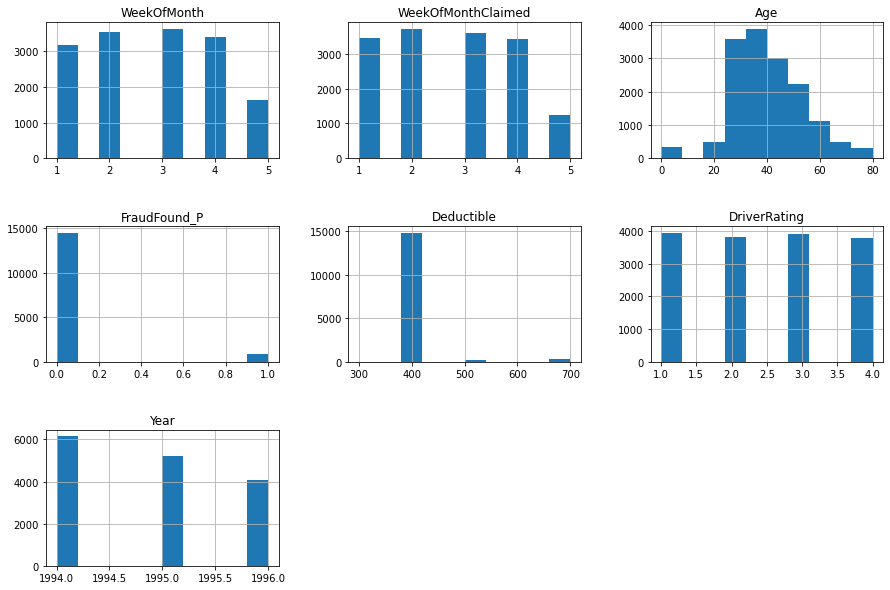

In [36]:
df.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5)

<AxesSubplot:xlabel='WeekOfMonth', ylabel='count'>

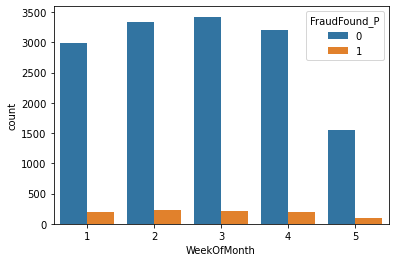

In [37]:
sns.countplot(x= "WeekOfMonth",hue= "FraudFound_P",data = df)

<AxesSubplot:xlabel='WeekOfMonthClaimed', ylabel='count'>

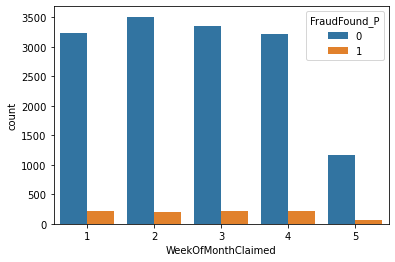

In [38]:
sns.countplot(x= "WeekOfMonthClaimed",hue= "FraudFound_P",data = df)

<AxesSubplot:xlabel='Year', ylabel='count'>

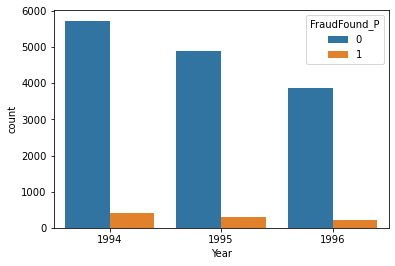

In [39]:
sns.countplot(x= "Year",hue= "FraudFound_P",data = df)

<AxesSubplot:xlabel='DriverRating', ylabel='count'>

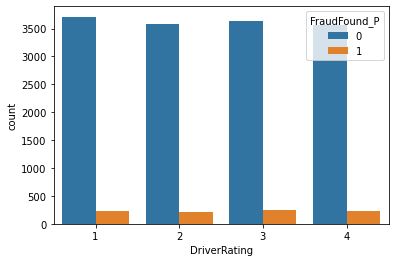

In [40]:
sns.countplot(x= "DriverRating",hue= "FraudFound_P",data = df)

<AxesSubplot:xlabel='Month', ylabel='count'>

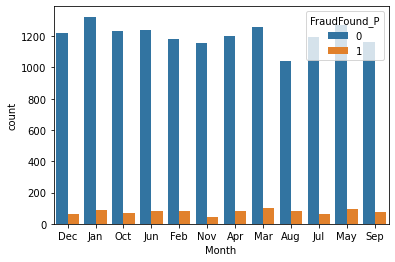

In [41]:
sns.countplot(x="Month", hue ='FraudFound_P', data=df)


<AxesSubplot:xlabel='Make', ylabel='count'>

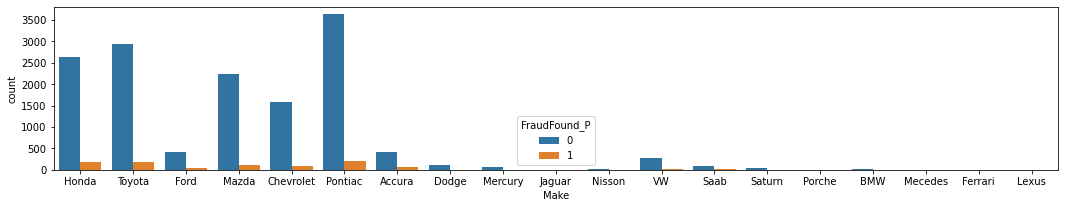

In [42]:
plt.figure(figsize=(18,3))
sns.countplot(x="Make" , hue = 'FraudFound_P', data= df)

<AxesSubplot:xlabel='AccidentArea', ylabel='count'>

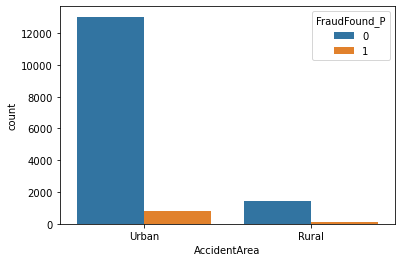

In [43]:
sns.countplot(x="AccidentArea" , hue = 'FraudFound_P', data= df)

<AxesSubplot:xlabel='Sex', ylabel='count'>

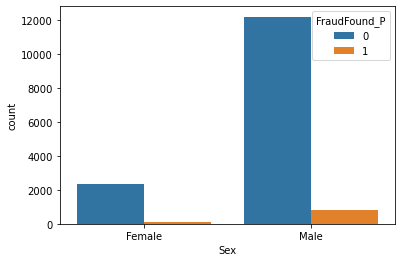

In [44]:
sns.countplot(x="Sex" , hue = 'FraudFound_P', data= df)

<AxesSubplot:xlabel='VehicleCategory', ylabel='count'>

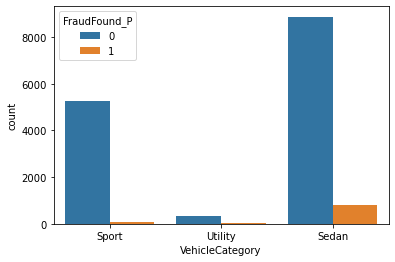

In [45]:
sns.countplot(x="VehicleCategory" , hue = 'FraudFound_P', data= df)

In [46]:
df.AccidentArea = df.AccidentArea.replace({'Urban':1, 'Rural':0})
df.Sex = df.Sex.replace({'Female':1, 'Male':0})
df.Fault = df.Fault.replace({'Policy Holder':1, 'Third Party':0})
df.PoliceReportFiled = df.PoliceReportFiled.replace({'Yes':1, 'No':0})
df.WitnessPresent = df.WitnessPresent.replace({'Yes':1, 'No':0})
df.AgentType = df.AgentType.replace({'External':1, 'Internal':0})
df.Month = df.Month.replace({'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12})
df.DayOfWeek = df.DayOfWeek.replace({'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7})
df.MonthClaimed = df.MonthClaimed.replace({'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12})
df.DayOfWeekClaimed = df.DayOfWeekClaimed.replace({'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7})
df.PastNumberOfClaims = df.PastNumberOfClaims.replace({'none':0 ,'1':1,'2 to 4':2,'more than 4':3})
df.NumberOfSuppliments = df.NumberOfSuppliments.replace({'none':0,'1 to 2':1,'3 to 5':2,'more than 5':4})
df.VehiclePrice = df.VehiclePrice.replace({'less than 20000':0,'20000 to 29000':1,'30000 to 39000':2,'40000 to 59000':3,'60000 to 69000':4,'more than 69000':5})
df.AgeOfVehicle = df.AgeOfVehicle.replace({'3 years':3,'6 years':6,'7 years':7,'more than 7':8,'5 years':5,'new':0,'4 years':4,'2 years':2})
df.Days_Policy_Accident = df.Days_Policy_Accident.replace({'more than 30':4,'15 to 30':3,'8 to 15':2,'1 to 7':1,'none':0})
df.Days_Policy_Claim = df.Days_Policy_Claim.replace({'more than 30':4,'15 to 30':3,'8 to 15':2,'1 to 7':1,'none':0})
df.AgeOfPolicyHolder = df.AgeOfPolicyHolder.replace({'16 to 17':1,'18 to 20':2,'21 to 25':3,'26 to 30':4,'31 to 35':5,'36 to 40':6,'41 to 50':7,'51 to 65':8,'over 65':9})
df.AddressChange_Claim = df.AddressChange_Claim.replace({'no change':0,'under 6 months':1,'1 year':2,'2 to 3 years':3,'4 to 8 years':4})
df.NumberOfCars = df.NumberOfCars.replace({'1 vehicle':1,'2 vehicles':2,'3 to 4':3,'5 to 8':4,'more than 8':5})


In [47]:
#Encode categorical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
feature_col = ['Make','MaritalStatus','VehicleCategory','BasePolicy', 'PolicyType']
for col in feature_col:
    df[col] = le.fit_transform(df[col])


<function matplotlib.pyplot.show(close=None, block=None)>

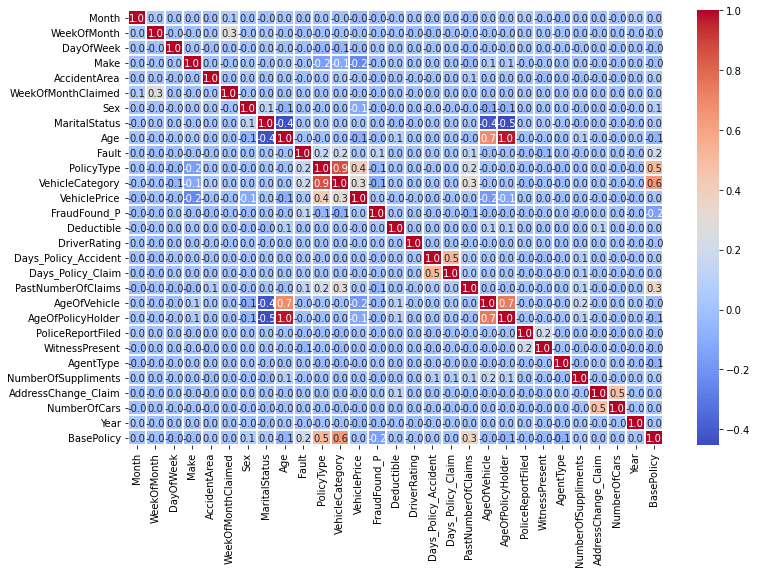

In [48]:
#Correlation plot
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt='.1f', linewidths=.1)
plt.show

In [49]:
#Split the data into features (X) and target variable (y)
X = df.drop(columns='FraudFound_P')
y = df['FraudFound_P']

In [50]:
# Split the data into 70% training and 30% testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [51]:
#Training the model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

LogisticRegression()

In [52]:
#Predicting the model for testing data
predicted = logistic_regression.predict(X_test)

In [53]:
#Checking coefficients of the trained model
print(logistic_regression.coef_)

[[-0.01116418 -0.05463219  0.05745988 -0.01406969 -0.04198674  0.0650757
   0.01346905 -0.02639811 -0.04925416 -0.0245154  -0.00459622  0.2815522
  -0.2742974  -0.21225649  0.1019614   0.00282333  0.05736857 -0.01717729
   0.00116447 -0.184699   -0.05226694 -0.0126883  -0.00625711 -0.00200275
   0.01135962 -0.10003339  0.05330805 -0.00839545 -0.00137429 -0.49149813]]


In [54]:
#Checking intercept of the model
print(logistic_regression.intercept_)

[3.65998801e-05]


In [55]:
#Checking accuracy score of the training dataset
score = logistic_regression.score(X_train, y_train)
print(round(score*100, 2))

94.09


In [57]:
#Checking accuracy score of the testing dataset
score = logistic_regression.score(X_test, y_test)
print(round(score*100, 2))


93.84


In [61]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

# Create the model
model = RandomForestClassifier()

# Train the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
# Print the evaluation metrics
print(f"Accuracy: {accuracy * 100}")

Accuracy: 93.8824038045828


From the above,we built two models: Random Forest  and logistic regression and it is evident(From the performance metrics) that both of the models can be used for the predicting whether a transaction is fraudulent or non-fraudulent.